In [41]:
# Import the necessary modules
from osgeo import gdal
import numpy as np
import pandas as pd

In [42]:
# Open the GeoTIFF files using GDAL
datasetTrainingGT = gdal.Open('S2A_MSIL1C_20220516_Train_GT.tif')

In [43]:
datasetTrainingGT

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x00000245F19521E0> >

In [44]:
# Read the data from the first GeoTIFF file into a NumPy array
trainGT2d = datasetTrainingGT.ReadAsArray()
trainGT2d = np.swapaxes(trainGT2d, 0, 1)
# Convert the 2-dimensional NumPy arrays into 2-dimensional arrays with rows and columns
trainGT1d = trainGT2d.reshape(trainGT2d.shape[0] * trainGT2d.shape[1], 1)

In [45]:
# Convert the combined array into a Pandas DataFrame
dfTrainLabels = pd.DataFrame(trainGT1d)

In [46]:
# Export the DataFrame as a CSV file
# dfTrainLabels.to_csv('train.csv', index=False)
np.save('train_gt.npy', trainGT1d)

In [47]:
datasetTraining = gdal.Open('S2A_MSIL1C_20220516_TrainingData.tif')

In [48]:
datasetTraining

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x0000024586933180> >

In [49]:
# Read the data from the first GeoTIFF file into a NumPy array
dataTraing = datasetTraining.ReadAsArray()
dataTraing = np.swapaxes(dataTraing, 0, 2)
# Convert the 2-dimensional NumPy arrays into 2-dimensional arrays with rows and columns
dataTraining1d = dataTraing.reshape(dataTraing.shape[0] * dataTraing.shape[1], -1)
dfTrain = pd.DataFrame(dataTraining1d)

final_data = pd.concat([dfTrainLabels, dfTrain])

train_label_data = pd.concat([dfTrainLabels, dfTrain], axis=1)
train_label_data.columns=['Code', 'Blue', 'Green', 'Red', 'NIR']
train_label_data.to_csv('train.csv')

np.save('train.npy', dataTraining1d)

In [50]:
datasetTestGT = gdal.Open('S2B_MSIL1C_20220528_Test.tif')

In [51]:
datasetTestGT

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000002459C3574E0> >

In [52]:
# Read the data from the first GeoTIFF file into a NumPy array
testGT2d = datasetTestGT.ReadAsArray()
testGT2d = testGT2d[1:, :]
testGT2d = np.swapaxes(testGT2d, 0, 1)
# Convert the 2-dimensional NumPy arrays into 2-dimensional arrays with rows and columns
testGT1d = testGT2d.reshape(testGT2d.shape[0] * testGT2d.shape[1], -1)

In [53]:
# Convert the combined array into a Pandas DataFrame
df = pd.DataFrame(testGT1d)

In [55]:
datasetTest = gdal.Open('S2B_MSIL1C_20220528_Test.tif')

In [54]:
# Export the DataFrame as a CSV file
df.to_csv('test_gt.csv')
np.save('test_gt.npy', testGT1d)

In [57]:
# Read the data from the first GeoTIFF file into a NumPy array
dataTest2d = datasetTest.ReadAsArray()
dataTest2d = np.swapaxes(dataTest2d, 0, 2)
# Convert the 2-dimensional NumPy arrays into 2-dimensional arrays with rows and columns
dataTest1d = dataTest2d.reshape(dataTest2d.shape[0] * dataTest2d.shape[1], -1)
np.save('test_all.npy', dataTest1d)
# Convert the combined array into a Pandas DataFrame
dfTest = pd.DataFrame(dataTest1d)
dfTest.columns=['Blue', 'Green', 'Red', 'NIR']
# Export the DataFrame as a CSV file
dfTest.to_csv('test.csv')

In [ ]:
len(testGT1d)

In [ ]:
df = pd.read_csv('test_gt.csv')
df.shape

In [816]:
from sklearn.model_selection import train_test_split
X_Test, X_Val, y_test, y_val = train_test_split(dataTraining1d, testGT1d, stratify=testGT1d, test_size=0.30)

## Read csv files

In [820]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [821]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [822]:
# df = df[:10000]
# df_test = df_test[:10000]

In [823]:
df.shape

(967005, 6)

In [824]:
df['Code'].unique()

array([10,  0, 50, 30, 90, 80, 60, 20, 40], dtype=int64)

In [825]:
df.head()

,Id,Code,Blue,Green,Red,NIR
0,0,10,0,0,0,0
1,1,10,1997,1982,1860,3672
2,2,10,1950,1906,1776,3335
3,3,10,1933,1886,1742,3390
4,4,10,2162,2035,2173,3605


In [826]:
df[['Blue','Green','Red','NIR']] = df[['Blue','Green','Red','NIR']].div(10000)
df.head()

,Id,Code,Blue,Green,Red,NIR
0,0,10,0.0000,0.0000,0.0000,0.0000
1,1,10,0.1997,0.1982,0.1860,0.3672
2,2,10,0.1950,0.1906,0.1776,0.3335
3,3,10,0.1933,0.1886,0.1742,0.3390
4,4,10,0.2162,0.2035,0.2173,0.3605


In [827]:
df_test[['Blue','Green','Red','NIR']] = df_test[['Blue','Green','Red','NIR']].div(10000)

In [828]:
df_test.shape

(4620309, 5)

In [829]:
df_test.head()

,Id,Blue,Green,Red,NIR
0,0,0.0000,0.0000,0.0000,0.0000
1,1,0.1938,0.1880,0.1683,0.3362
2,2,0.1943,0.1874,0.1661,0.3388
3,3,0.1959,0.1876,0.1690,0.3354
4,4,0.1943,0.1873,0.1696,0.3305


In [830]:
df.shape

(967005, 6)

## z_score

In [102]:
columns = ['Blue','Green','Red','NIR']

In [47]:
from scipy.stats import norm
from scipy.stats import multivariate_normal as mn

columns = ['Blue','Green','Red','NIR']


# def z_score(df, threshold=1):
#     mean, std = np.mean(df), np.std(df)
# #     z_score = np.abs((df - mean) / std)
#     good = z_score < threshold
#     print(f"z-score of {threshold} corresponds to a prob of {100 * 2 * norm.sf(3):0.2f}%")
#     print(f"Rejection {(~good).sum()} points")
#     z_score = np.abs(zscore(df))
#     df[(z_score < threshold).all(axis=1)]
#     return df


def z_score(df,columns,threshold = 1):
#     Calculate the Z-score for each value in the selected columns:
    for column in columns:
        column_zscore = (df[column] - df[column].mean())/df[column].std(ddof=0)
        df[f"{column}_zscore"] = column_zscore
#     Create a boolean mask to identify the outliers:
    outliers_mask = (df[f"{column}_zscore"] > threshold) | (df[f"{column}_zscore"] < -threshold)
    
#     Remove the outliers from the DataFrame:
    df = df[~outliers_mask]
    print(df.shape)
    return df

In [48]:
df =  z_score(df,columns)

(749553, 10)


In [121]:
df.shape

(749553, 10)

In [122]:
df.head()

,Id,Code,Blue,Green,Red,NIR,Blue_zscore,Green_zscore,Red_zscore,NIR_zscore
2,2,10,0.1950,0.1906,0.1776,0.3335,-1.356239,-0.939508,-0.806083,0.825154
3,3,10,0.1933,0.1886,0.1742,0.3390,-1.405272,-0.989215,-0.866024,0.887137
6,6,10,0.1970,0.1832,0.1841,0.3288,-1.298553,-1.123425,-0.691489,0.772187
7,7,10,0.1854,0.1820,0.1584,0.3102,-1.633130,-1.153249,-1.144574,0.562573
8,8,10,0.1878,0.1830,0.1667,0.3240,-1.563907,-1.128395,-0.998247,0.718093


In [123]:
df = df.drop(['Blue_zscore','Green_zscore','Red_zscore','NIR_zscore'], axis=1)

In [124]:
df.shape

(749553, 6)

In [125]:
df.head()

,Id,Code,Blue,Green,Red,NIR
2,2,10,0.1950,0.1906,0.1776,0.3335
3,3,10,0.1933,0.1886,0.1742,0.3390
6,6,10,0.1970,0.1832,0.1841,0.3288
7,7,10,0.1854,0.1820,0.1584,0.3102
8,8,10,0.1878,0.1830,0.1667,0.3240


# IQR

In [259]:
Q1 = df[['Blue','Green','Red','NIR']].quantile(0.25)
Q3 = df[['Blue','Green','Red','NIR']].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[['Blue','Green','Red','NIR']] < (Q1 - 1.5 * IQR)) |(df[['Blue','Green','Red','NIR']] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(819064, 6)

# IQR v2

In [218]:
columns = ['Blue','Green','Red','NIR']

In [219]:
def removeOutliers(df,col):
    # IQR
    Q1 = np.percentile(df[col], 25,
                   method = 'midpoint')
 
    Q3 = np.percentile(df[col], 75,
                   method = 'midpoint')
    IQR = Q3 - Q1


    print("Old Shape: ", df.shape)
 
    # Upper bound
    upper = df[col] >= (Q3+1.5*IQR)
    # Lower bound
    lower = df[col] <= (Q1-1.5*IQR)
 
    ''' Removing the Outliers '''
    df = df[~upper]
    df = df[~lower]
 
    print("New Shape: ", df.shape)
    return df

In [220]:
df = removeOutliers(df,'Blue')

Old Shape:  (967005, 6)
New Shape:  (901407, 6)


C:\Users\Dell\AppData\Local\Temp\ipykernel_17760\3565903680.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~lower]


In [221]:
df = removeOutliers(df,'Green')

Old Shape:  (901407, 6)
New Shape:  (866044, 6)


C:\Users\Dell\AppData\Local\Temp\ipykernel_17760\3565903680.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~lower]


In [222]:
df = removeOutliers(df,'Red')

Old Shape:  (866044, 6)
New Shape:  (795585, 6)


C:\Users\Dell\AppData\Local\Temp\ipykernel_17760\3565903680.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~lower]


In [223]:
df = removeOutliers(df,'NIR')

Old Shape:  (795585, 6)
New Shape:  (627333, 6)


C:\Users\Dell\AppData\Local\Temp\ipykernel_17760\3565903680.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~lower]


## Remove zeros

In [831]:
df = df[(df != 0).all(1)]
df.shape

(965282, 6)

In [832]:
df.dropna()
df.shape

(965282, 6)

In [833]:
# Import seaborn
import seaborn as sns

In [834]:
df['Code'].value_counts()

80    618857
50    143382
30    108240
10     57999
20     15703
60     15014
40      4342
90      1745
Name: Code, dtype: int64

<AxesSubplot:xlabel='Code', ylabel='Count'>

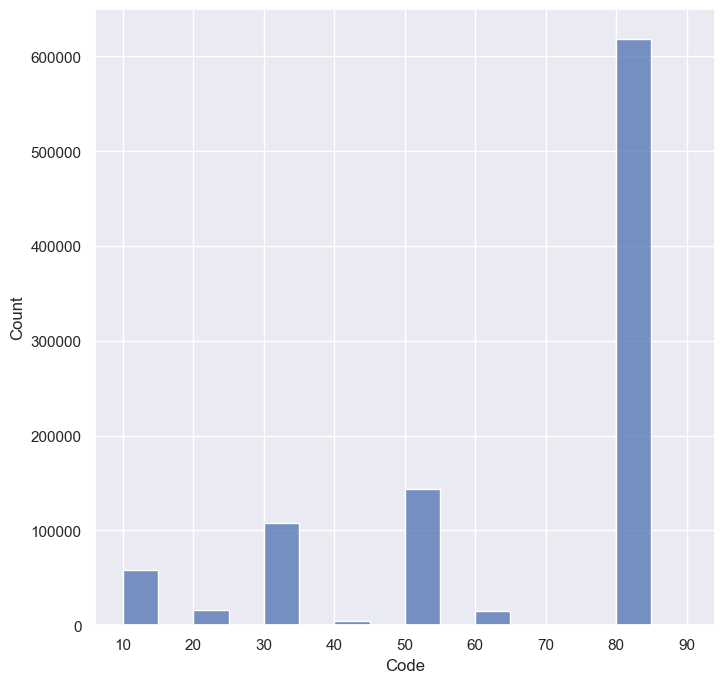

In [835]:
sns.histplot(data=df, x="Code",binwidth=5)

## Add NDVI and NDWI

In [647]:
# Extract the red, green and blue bands from the dataframe:
red = df["Red"]
green = df["Green"]
blue = df["Blue"]
NIR = df['NIR']

# Compute the NDVI:
ndvi = (NIR - red) / (NIR + red)

# Compute the NDWI:
ndwi = (green - NIR) / (green + NIR)

# Add the NDVI and NDWI indices to the DataFrame:
df["NDVI"] = ndvi
df["NDWI"] = ndwi

In [648]:
df.head()

,Id,Code,Blue,Green,Red,NIR,NDVI,NDWI
1,1,10,0.1997,0.1982,0.1860,0.3672,0.327549,-0.298903
2,2,10,0.1950,0.1906,0.1776,0.3335,0.305028,-0.272658
3,3,10,0.1933,0.1886,0.1742,0.3390,0.321122,-0.285064
4,4,10,0.2162,0.2035,0.2173,0.3605,0.247837,-0.278369
5,5,10,0.2159,0.2165,0.2112,0.3611,0.261926,-0.250346


## Select features to train

In [702]:
X = df.iloc[:,[2,3,4,5]]
y = df.iloc[:,[1]]
print(len(X))
print(len(y))

965282
965282


In [684]:
X.head()

,Blue,Green,Red,NIR
1,0.1997,0.1982,0.1860,0.3672
2,0.1950,0.1906,0.1776,0.3335
3,0.1933,0.1886,0.1742,0.3390
4,0.2162,0.2035,0.2173,0.3605
5,0.2159,0.2165,0.2112,0.3611


## Train_test_split

In [757]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.010)

## SVC

In [50]:
%%time
# import SVC classifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
# svc=SVC(C=5,kernel='linear') 
svc=LinearSVC(C=5,dual=False) 
# svc = LinearSVC(loss='hinge', intercept_scaling=1000)

# fit classifier to training set
svc.fit(X_train,np.ravel(y_train))


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.6414
CPU times: total: 3.12 s
Wall time: 2.98 s


In [51]:
# Evaluate the accuracy of the classifier
from sklearn import metrics  
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

f1_score_knn= metrics.f1_score(y_test,y_pred, average = "macro" )
f1_score_knn

Accuracy: 64.14%


0.0976916943493637

## RandomForest

In [775]:
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 250)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train,np.ravel(y_train))
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

# Evaluate the accuracy of the classifier
from sklearn import metrics  
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

f1_score_random_forest= metrics.f1_score(y_test,y_pred, average = "macro" )
f1_score_random_forest


ACCURACY OF THE MODEL:  0.9037604889671604
Accuracy: 90.38%


0.5811045896683569

                        precision    recall  f1-score   support

            Tree cover       0.67      0.63      0.65       580
             Shrubland       0.58      0.54      0.56       157
             Grassland       0.66      0.73      0.70      1082
              Cropland       0.50      0.21      0.30        43
              Built-up       0.81      0.85      0.83      1434
Bare/sparse vegetation       0.54      0.25      0.35       150
Permanent water bodies       1.00      0.99      0.99      6189
    Herbaceous wetland       0.20      0.06      0.09        18

              accuracy                           0.90      9653
             macro avg       0.62      0.53      0.56      9653
          weighted avg       0.89      0.90      0.89      9653



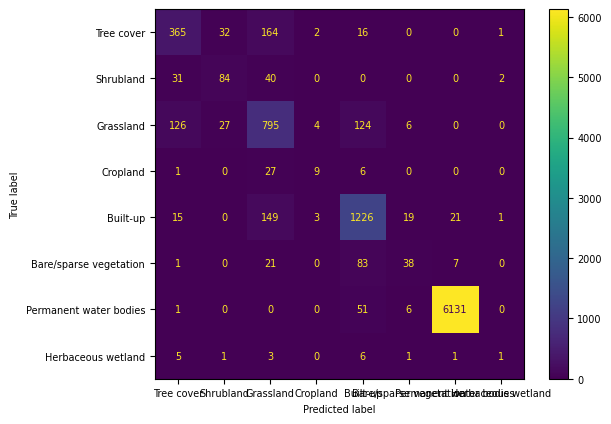

In [776]:
# Compute the confusion matrix
labels = ['Tree cover', 'Shrubland', 'Grassland', 'Cropland', 'Built-up', 'Bare/sparse vegetation', 'Permanent water bodies', 'Herbaceous wetland']
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict,target_names=labels))
# print(cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

In [45]:
# conf_mtrx = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix')
# print(conf_mtrx)
# print()

# print('Classification Report')
# print(classification_report(y_test, y_pred))

Confusion Matrix
[[  6269    315   3617      2    686      9      6     20]
 [   350   1954    846      0      9      0      0      5]
 [  1854    614  24715     95   2093     78     58     47]
 [     4      0    709    264    137      0      1      1]
 [   293     12   2737     36  10964     63    407     36]
 [     9      0    232      2    604    562    162     36]
 [     8      0     46      0    714     48 183332     22]
 [    18      0     73      0     77     79     28    237]]

Classification Report
              precision    recall  f1-score   support

          10       0.71      0.57      0.64     10924
          20       0.67      0.62      0.64      3164
          30       0.75      0.84      0.79     29554
          40       0.66      0.24      0.35      1116
          50       0.72      0.75      0.74     14548
          60       0.67      0.35      0.46      1607
          80       1.00      1.00      1.00    184170
          90       0.59      0.46      0.52       512


## Bayes

In [739]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(var_smoothing=1)
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

f1_score= metrics.f1_score(y_test,y_pred, average = "macro")
f1_score

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gaussian Naive Bayes model accuracy(in %): 76.58758935046099


0.25532475662486653

# KNN

In [758]:
# Create the KNN classifier with k=1
clf = KNeighborsClassifier(n_neighbors=5)
# Use cross-validation to evaluate the model's accuracy
scores = cross_val_score(clf, X_train, np.ravel(y_train), cv=5)
acc = scores.mean()
print(acc)

0.8932839005866215


In [759]:
# Fit the classifier to the data
clf.fit(X_train, np.ravel(y_train))
# Predict labels for new data
y_predict = clf.predict(X_test)
print(y_predict[:30])

[80 80 80 30 80 20 80 50 80 80 80 50 80 10 50 80 10 80 30 80 80 50 80 80
 80 80 80 50 80 50]


In [760]:
# Evaluate the accuracy of the classifier
from sklearn import metrics  
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy:.2%}')

f1_score_knn= metrics.f1_score(y_test,y_predict, average = "macro" )
f1_score_knn

Accuracy: 89.60%


0.5571067560636105

                        precision    recall  f1-score   support

            Tree cover       0.67      0.63      0.65       580
             Shrubland       0.58      0.54      0.56       157
             Grassland       0.66      0.73      0.70      1082
              Cropland       0.50      0.21      0.30        43
              Built-up       0.81      0.85      0.83      1434
Bare/sparse vegetation       0.54      0.25      0.35       150
Permanent water bodies       1.00      0.99      0.99      6189
    Herbaceous wetland       0.20      0.06      0.09        18

              accuracy                           0.90      9653
             macro avg       0.62      0.53      0.56      9653
          weighted avg       0.89      0.90      0.89      9653



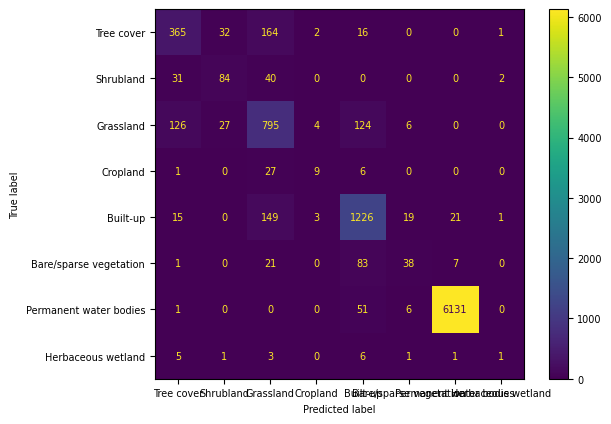

In [774]:
# Compute the confusion matrix
labels = ['Tree cover', 'Shrubland', 'Grassland', 'Cropland', 'Built-up', 'Bare/sparse vegetation', 'Permanent water bodies', 'Herbaceous wetland']
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict,target_names=labels))
# print(cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

In [537]:
y_test_arr = np.array(y_test)

In [538]:
y_pred[160]

50

In [539]:
y_test_arr[160]

array([80], dtype=int64)

In [540]:
if(y_test_arr[160] == y_pred[160] ):
    print("same")

In [541]:
np.shape(y_test_arr)

(96529, 1)

In [542]:
index_same = []
index_diff = []
for i in range(len(y_test)):
    if(y_pred[i] == y_test_arr[i]):
        index_same.append(i)
    else:
        index_diff.append(i)
print("index_same ",len(index_same))
print("index_diff ",len(index_diff))

index_same  11739
index_diff  84790


In [543]:
X_new_train = X_train.drop(index=X_train.index[index_same])

In [544]:
y_new_train = y_train.drop(index=y_train.index[index_same])

In [545]:
X_new_test = X_test.drop(index=X_test.index[index_same])

In [546]:
y_new_test = y_test.drop(index=y_test.index[index_same])

In [547]:
# Fit the classifier to the data
clf.fit(X_new_train, np.ravel(y_new_train))
# Predict labels for new data
y_predict = clf.predict(X_new_test)
print(y_predict[:30])

[30 80 50 80 80 80 30 80 80 80 80 50 10 50 80 80 50 50 80 80 10 80 80 80
 30 50 50 80 80 80]


In [548]:
# Evaluate the accuracy of the classifier
from sklearn import metrics  
accuracy = accuracy_score(y_new_test, y_predict)
print(f'Accuracy: {accuracy:.2%}')

f1_score_knn= metrics.f1_score(y_new_test,y_predict, average = "macro" )
f1_score_knn

Accuracy: 91.04%


0.5528335262014172

In [549]:
y_test_arr = np.array(y_new_test)

In [550]:
index_same = []
index_diff = []
for i in range(len(y_test_arr)):
    if(y_pred[i] == y_test_arr[i]):
        index_same.append(i)
    else:
        index_diff.append(i)
print("index_same ",len(index_same))
print("index_diff ",len(index_diff))

index_same  4920
index_diff  79870


In [551]:
X_new_train2 = X_new_train.drop(index=X_new_train.index[index_same])

In [552]:
y_new_train2 = y_new_train.drop(index=y_new_train.index[index_same])

In [553]:
X_new_test2 = X_new_test.drop(index=X_new_test.index[index_same])

In [554]:
y_new_test2 = y_new_test.drop(index=y_new_test.index[index_same])

In [555]:
# Fit the classifier to the data
clf.fit(X_new_train2, np.ravel(y_new_train2))
# Predict labels for new data
y_predict = clf.predict(X_new_test2)
print(y_predict[:30])

[30 80 50 80 80 80 30 80 80 80 80 50 10 50 80 80 50 50 80 80 10 80 80 80
 80 80 80 80 80 80]


In [556]:
# Evaluate the accuracy of the classifier
from sklearn import metrics  
accuracy = accuracy_score(y_new_test2, y_predict)
print(f'Accuracy: {accuracy:.2%}')

f1_score_knn= metrics.f1_score(y_new_test2,y_predict, average = "macro" )
f1_score_knn

Accuracy: 91.80%


0.5267115819322742

In [557]:
y_test_arr = np.array(y_new_test2)

In [558]:
index_same = []
index_diff = []
for i in range(len(y_test_arr)):
    if(y_pred[i] == y_test_arr[i]):
        index_same.append(i)
    else:
        index_diff.append(i)
print("index_same ",len(index_same))
print("index_diff ",len(index_diff))

index_same  2506
index_diff  77364


In [559]:
X_new_train3 = X_new_train2.drop(index=X_new_train2.index[index_same])

In [560]:
y_new_train3 = y_new_train2.drop(index=y_new_train2.index[index_same])

In [561]:
X_new_test3 = X_new_test2.drop(index=X_new_test2.index[index_same])

In [562]:
y_new_test3 = y_new_test2.drop(index=y_new_test2.index[index_same])

In [563]:
# Fit the classifier to the data
clf.fit(X_new_train3, np.ravel(y_new_train3))
# Predict labels for new data
y_predict = clf.predict(X_new_test3)
print(y_predict[:30])

[30 80 50 80 80 80 30 80 80 80 80 50 10 50 80 80 50 50 80 80 10 80 80 80
 80 80 80 80 80 80]


In [564]:
# Evaluate the accuracy of the classifier
from sklearn import metrics  
accuracy = accuracy_score(y_new_test3, y_predict)
print(f'Accuracy: {accuracy:.2%}')

f1_score_knn= metrics.f1_score(y_new_test3,y_predict, average = "macro" )
f1_score_knn

Accuracy: 92.11%


0.5062924507748986

In [565]:
y_test_arr = np.array(y_new_test3)

In [566]:
index_same = []
index_diff = []
for i in range(len(y_test_arr)):
    if(y_pred[i] == y_test_arr[i]):
        index_same.append(i)
    else:
        index_diff.append(i)
print("index_same ",len(index_same))
print("index_diff ",len(index_diff))

index_same  1604
index_diff  75760


## KNN hyperparameter tuning

In [27]:
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [5,7,9,11,13,15,17],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [28]:
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [29]:
g_res.best_score_

0.9534700890251049

In [30]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [31]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance',metric = 'manhattan')

# Use cross-validation to evaluate the model's accuracy
scores = cross_val_score(knn, X_train, np.ravel(y_train), cv=5)
acc = scores.mean()
print(acc)


0.9567529550470161


In [32]:
knn.fit(X_train, np.ravel(y_train))

# Predict labels for new data
y_predict = knn.predict(X_test)
print(y_predict[:30])

[80 80 80 80 80 80 30 80 80 80 80 10 80 80 10 80 30 80 80 80 80 10 20 80
 80 80 30 80 80 80]


In [33]:
# Evaluate the accuracy of the classifier
from sklearn import metrics  
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy:.2%}')

f1_score_knn= metrics.f1_score(y_test,y_predict, average = "macro" )
f1_score_knn

Accuracy: 96.02%


0.8517527295570915

In [34]:
conf_mtrx = confusion_matrix(y_test, y_predict)
print('Confusion Matrix')
print(conf_mtrx)
print()

print('Classification Report')
print(classification_report(y_test, y_predict))

Confusion Matrix
[[ 5147    65   398     1   179     8     1     1]
 [   74  1372   115     0     4     2     0     3]
 [  409   124  9540    66   521   125    27    12]
 [    1     0    96   315    20     2     0     0]
 [  157     4   451    21 13462   143    86    14]
 [    3     0   124     0   293  1000    79     3]
 [    7     0    18     0   110    29 61720     2]
 [    1     0     6     1    10    12    11   134]]

Classification Report
              precision    recall  f1-score   support

          10       0.89      0.89      0.89      5800
          20       0.88      0.87      0.88      1570
          30       0.89      0.88      0.88     10824
          40       0.78      0.73      0.75       434
          50       0.92      0.94      0.93     14338
          60       0.76      0.67      0.71      1502
          80       1.00      1.00      1.00     61886
          90       0.79      0.77      0.78       175

    accuracy                           0.96     96529
   macro 

In [805]:
df.drop(df[(df['Code'] == 40) | (df['Code']== 90) ].index, inplace=True)

# Gradient boosting

In [806]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [ ]:
# gbc = GradientBoostingClassifier()
# parameters = {
#     "n_estimators":[5,50,250,500],
#     "max_depth":[1,3,5,7,9],
#     "learning_rate":[0.01,0.1,1,10,100]
# }

In [ ]:
# from sklearn.model_selection import GridSearchCV
# cv = GridSearchCV(gbc,parameters,cv=5)
# cv.fit(X_train,y_train.values.ravel())

In [811]:
clf = OneVsRestClassifier(GradientBoostingClassifier(max_depth  = 3 , n_estimators= 500, learning_rate = 0.01, random_state=33), n_jobs=-1)
#Use cross-validation to evaluate the model's accuracy
# scores = cross_val_score(clf, X_Train, np.ravel(y_Train), cv=5)
# acc = scores.mean()

In [ ]:
# scores = cross_val_score(clf, X_train, np.ravel(y_train), cv=5)


In [ ]:
# acc = scores.mean()
# print(acc)

In [812]:
import time

start_time = time.time()

# Fit the classifier to the data
clf.fit(X_train, np.ravel(y_train))

elapsed_time = time.time() - start_time

print(elapsed_time)

# Predict labels for new data
predictions = clf.predict(X_test)

1934.178659439087


In [813]:
from sklearn.metrics import f1_score
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2%}')



rf_f1_tuned= f1_score(y_test,predictions, average = "macro" )
rf_f1_tuned

Accuracy: 89.88%


0.5000418726268266

In [814]:
prediction = clf.predict(test)
prediction[:30]

array([80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80,
       80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80], dtype=int64)

In [815]:
df = pd.DataFrame(prediction)
df.index.name = 'Id'
df.columns=['Code']
# Export the DataFrame as a CSV file
df.to_csv('submission4.csv')
df.head()

,Code
Id,
0,80
1,80
2,80
3,80
4,80


## USE IF YOU ADDED NVI, NDWI

In [593]:
# # Extract the red, green and blue bands from the dataframe:
# red = df_test["Red"]
# green = df_test["Green"]
# blue = df_test["Blue"]
# NIR = df_test['NIR']

# # Compute the NDVI:
# ndvi = (NIR - red) / (NIR + red)

# # Compute the NDWI:
# ndwi = (green - NIR) / (green + NIR)

# # Add the NDVI and NDWI indices to the DataFrame:
# df_test["NDVI"] = ndvi
# df_test["NDWI"] = ndwi
# df_test = df_test.fillna(0)

In [594]:
df_test.head()

,Id,Blue,Green,Red,NIR,NDVI,NDWI
0,0,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000
1,1,0.1938,0.1880,0.1683,0.3362,0.332805,-0.282717
2,2,0.1943,0.1874,0.1661,0.3388,0.342048,-0.287723
3,3,0.1959,0.1876,0.1690,0.3354,0.329897,-0.282600
4,4,0.1943,0.1873,0.1696,0.3305,0.321736,-0.276555


## Predict test_data

In [740]:
# X2 = df_test.iloc[:,[1,2,3,4,5,6]]
X2 = df_test.iloc[:,[1,2,3,4]] # without ndwi
y_pred = gnb.predict(X2)
print(y_pred[0:30])

[80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 30
 30 30 30 30 80 80]


In [742]:
df = pd.DataFrame(y_pred)
df.index.name = 'Id'
df.columns=['Code']
# Export the DataFrame as a CSV file
df.to_csv('submission1.csv')
df.head()

,Code
Id,
0,80
1,80
2,80
3,80
4,80


In [131]:
df2.shape

(4620309, 2)

In [129]:
df2['Code'].value_counts()

50    4618000
10       2309
Name: Code, dtype: int64